# News Event EDA
--------------------------
We scraped news event from wikipidia and would like to see how it count possibly related to Crypto-currency

In [2]:
%load_ext autoreload
%autoreload 2
# Set up and import data
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import numpy as np

#pd.describe_option()
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', -1)

data_location = r'Scrapers/News/WikipediaEvent/WikiEvent.json'

news = pd.read_json(data_location)

# Add year, date-of-year, date-of-month
news['year'] = news['date'].apply(lambda x: x.year)
news['month'] = news['date'].apply(lambda x: x.month)
news['doy'] = news['date'].apply(lambda x: x.dayofyear)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Enlarge display size
pd.set_option('display.max_colwidth', -1)

crypo_keywords = ['Bitcoin', 'Bitcoin Cash', 'Litecoin', 'Cardano', 'Satoshi Nakamoto',
            'NEO', 'Stellar', 'IOTA', 'Monero', 'Ethereum Classic', 'VeChain', 'Lisk', 
            'Qtum', 'Bitcoin Gold', 'Bytecoin', 'Binance Coin', 'Dogecoin', 
            'DigixDAO', 'BitShares', 'KuCoin Shares', 'Cryptonex', 'MonaCoin', 
            'QASH', 'PIVX', 'Bitcore', 'ReddCoin', 'GXShares', 'ZCoin', 'MaidSafeCoin', 
            'Vertcoin', 'Particl', 'Enigma', 'Neblio', 'Emercoin', 'TenX', 'Blocknet', 
            'SmartCash', 'GameCredits']

(news[news['news_header'].str.contains('|'.join(crypo_keywords))])[['category','date','news_header']]

,category,date,news_header
19003,NaN,2009-01-03,Satoshi Nakamoto creates the genesis block of bitcoin. (bitcoin.it)
45808,Business and economy,2013-11-27,"The price of one Bitcoin breaks above $1,000 for the first time, and marks a rise of over 7,600 percent so far this year. ()"
46125,Business and economy,2013-12-26,The Reserve Bank of India warns users of risks involved in virtual currencies such as Bitcoin and Dogecoin. (T.I.P. News)
46404,Business and economy,2014-01-21,"First time in the history of digital currency, two Las Vegas casinos begin to accept Bitcoin. (Forbes)"
52359,Law and crime,2015-09-11,"Mark Karpele?s, the CEO of defunct Bitcoin exchange Mt. Gox, is charged with embezzlement in Japan. Karpeles asserts his own innocence. (AFP via France 24)"
53770,Law and crime,2015-12-09,"The Australian Federal Police raid the Sydney home of Craig Steven Wright ? whom media today claimed was suspected to be Satoshi Nakamoto, the founder of Bitcoin ? in relation to possible tax offences. (ABC News Australia)"
55889,Business and economy,2016-05-02,"Australian tech entrepreneur Craig Steven Wright claims he is Satoshi Nakamoto, the creator of the Bitcoin currency. There are about 15.5 million bitcoins in circulation. However, questions have been raised as to authenticity of his assertion. () (BBC) (2) (AP via )"


# Lets do sentiment analysis for news
-------------------------------------------------
Vader can help us to do the job

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

sid = SentimentIntensityAnalyzer()
news['score']=news['news_header'].apply(lambda x:sid.polarity_scores(x)['compound'])

/sharesoft/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Check to see if it make sense

In [5]:
bad_news = news[(news['date']>='2014-01-01') & (news['score'] <= 0)]
good_news = news[(news['date']>='2014-01-01') & (news['score'] >= 0)]

In [6]:
bad_news[:10]

,category,date,day_of_week,news_header,source_list,source_names,sub_category,year,month,doy,score
46170,Armed conflicts and attacks,2014-01-01,Wednesday,"Police in Indonesia exchange gunfire with suspected militants near Jakarta, killing six people. (ABC)","[[ABC, http://www.abc.net.au/news/2014-01-01/indonesian-police-in-shootout-with-terrorists/5180656]]",ABC,,2014,1,1,-0.7430
46172,Armed conflicts and attacks,2014-01-01,Wednesday,"11 people are killed in bomb attacks outside a hotel in the Somali capital Mogadishu. (Standard Media), (Reuters)",[],,War in Somalia (2009?present),2014,1,1,-0.8910
46174,Disasters and accidents,2014-01-01,Wednesday,"A three-story building, housing apartments and a grocery store, explodes and burns in the Cedar-Riverside neighborhood of Minneapolis, Minnesota, injuring 13 people, some critically. (CNN)","[[CNN, http://www.cnn.com/2014/01/01/us/minnesota-blast/index.html?hpt=hp_t2]]",CNN,,2014,1,1,0.0000
46175,Disasters and accidents,2014-01-01,Wednesday,"Indonesia's Sinabung volcano erupts, displacing more than 19,000 people. (ABC News)","[[ABC News, http://www.abc.net.au/news/2013-12-31/192c000-flee-erupting-volcano-in-indonesia/5180216]]",ABC News,,2014,1,1,0.0000
46176,Law and crime,2014-01-01,Wednesday,"Jamal al-Jamal, a Palestinian ambassador to the Czech Republic, is killed in an explosion near his home in Prague. (Reuters), (CNN)","[[Reuters, https://www.reuters.com/article/2014/01/01/us-czech-palestinian-idUSBREA0008E20140101], [CNN, http://edition.cnn.com/2014/01/01/world/europe/czech-republic-blast-palestinian/index.html?hpt=hp_t3]]","Reuters,CNN",,2014,1,1,-0.6705
46177,Law and crime,2014-01-01,Wednesday,"Catholic priest Rev. Eric Freed was found bludgeoned to death in the rectory of his church in Eureka, California. Suspect Gary Lee Bullock was arrested, and had been jailed, hospitalized and released due to erratic behavior just before the killing. Freed was named by the Vatican as one of 22 Catholic priests and religious who were killed during 2013 Spero News Seattle PI","[[Spero News, http://www.speroforum.com/a/HPTSLGARLQ52/74667-Vatican-releases-partial-list-of-martyrs-for-the-faith#.UtQsUdJDv9Y], [Seattle PI, http://www.seattlepi.com/news/crime/article/Police-No-reason-to-hold-priest-slaying-suspect-5110350.php]]","Spero News,Seattle PI",,2014,1,1,-0.9509
46178,Law and crime,2014-01-01,Wednesday,Recreational marijuana stores open in Colorado. (CNN),"[[CNN, http://www.cnn.com/2013/12/31/us/colorado-recreational-marijuana/index.html?hpt=hp_t3]]",CNN,,2014,1,1,0.0000
46179,Politics and elections,2014-01-01,Wednesday,Bill de Blasio is sworn in as the 109th Mayor of New York City. (AP via ),"[[AP via , https://www.usatoday.com/story/news/politics/2014/01/01/deblasio-sworn-in/4274669/]]",AP via,,2014,1,1,0.0000
46180,Sport,2014-01-01,Wednesday,"In front of a crowd of 105,491 at Michigan Stadium in Ann Arbor, Michigan, potentially the largest ever to attend an ice hockey game, the Toronto Maple Leafs defeat the Detroit Red Wings 3?2 after a shootout in the 2014 NHL Winter Classic. (ESPN)","[[ESPN, http://scores.espn.go.com/nhl/recap?gameId=400484853]]",ESPN,,2014,1,1,-0.4588
46182,Armed conflicts and attacks,2014-01-02,Thursday,"Armed tribesmen and ISIS militants control the Iraqi cities of Fallujah and Ramadi, after days of violence that erupted as a protest camp was removed. (Al Bawaba), (AFP)13 people are killed in a suicide bombing in Balad Ruz, near Baqubah. (Abram Online)",[],,Iraqi insurgency (post-U.S. withdrawal),2014,1,2,-0.9442


# What are the news categories? Lets check the distrubition.

In [7]:
category = news['category'].dropna().unique()
counts = news.groupby(['category']).size().to_frame(name='counts')
counts

,counts
category,
Accidents,1
Accidents and Disasters,1
Accidents and disasters,14
Architecture,1
Armed Conflicts and attacks,2
Armed attacks,3
Armed attacks and conflicts,48
Armed conflict,7
Armed conflict and attack,5


# Looks like the data is not clean, entity resolution can resolve the issue

In [12]:
import math

def alphnum(s):
    sep = re.compile(r"[\W]")
    items = sep.split(s)
    return " ".join([item for item in items if item.strip()!=""])

def wordset(s, lower_case = True, alphanum_only = True):
    if lower_case:
        s = s.lower()
    if alphanum_only:
        s = alphnum(s)
    return s.split()
    
def jaccard(s, t, threshold=0.25):
    if len(s) < len(t):
        if len(s) < len(t)*threshold:
            return 0
    else:
        if len(t) < len(s)*threshold:
            return 0
    intersect = len(set(s) & set(t))
    union = len(t) + len(s) - intersect

    if union != 0 and intersect*1.0/union+1e-6 >= threshold:
        return intersect*1.0/union
    else:
        return 0


In [13]:
k_o_list = [(wordset(row) , row) for row in category.tolist()] 

# Find sim data recursively
def addlist(iset, item, l):
    if len(l) == 0:
        return iset, l
    for i in l:
        if jaccard(item[0], i[0]) > 0:
            iset.append(i)
            l.remove(i)
            addlist(iset, i, l)
    return iset, l

groups = []
for v1 in k_o_list:
    iset = []
    iset, l = addlist(iset, v1, k_o_list[1:])
    k_o_list = l
    if len(iset) > 0:
        iset.append(v1)
        groups.append((iset))

mapping = dict()
for group in groups:
    text = [v for k,v in group]
    target = max(text, key=len)
    for i in text:
        mapping[i]=target

mapping

{'Accidents': 'Armed conflicts and incidents',
 'Accidents and Disasters': 'Armed conflicts and incidents',
 'Accidents and disasters': 'Armed conflicts and incidents',
 'Armed Conflicts and attacks': 'Armed conflicts and incidents',
 'Armed attacks': 'Armed conflicts and incidents',
 'Armed attacks and conflicts': 'Armed conflicts and incidents',
 'Armed conflict': 'Armed conflicts and incidents',
 'Armed conflict and attack': 'Armed conflicts and incidents',
 'Armed conflict and attacks': 'Armed conflicts and incidents',
 'Armed conflict and incidents': 'Armed conflicts and incidents',
 'Armed conflicts': 'Armed conflicts and incidents',
 'Armed conflicts and attack': 'Armed conflicts and incidents',
 'Armed conflicts and attacks': 'Armed conflicts and incidents',
 'Armed conflicts and incidents': 'Armed conflicts and incidents',
 'Art and culture': 'Arts, culture and entertainment',
 'Arts & Culture': 'Arts, culture and entertainment',
 'Arts and Culture': 'Arts, culture and enterta

## The mapping make sense to me, lets replace the category

In [14]:
news['category'].replace(mapping, inplace=True)

# Now plot the data

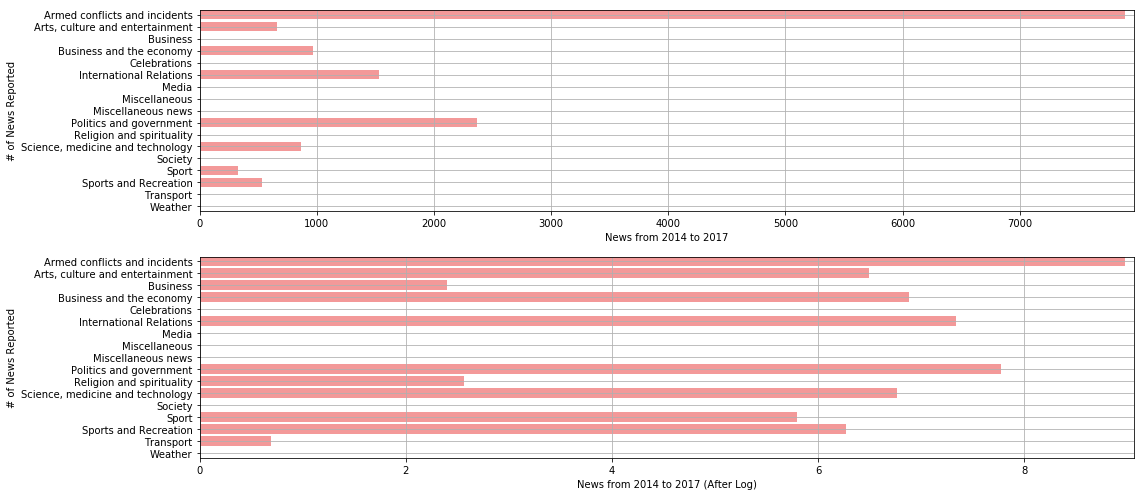

In [15]:
import matplotlib.pyplot as plt
import numpy as np

years = news[(news['year'] >= 2014)]
category = years['category'].unique()
counts = years.groupby(['category']).size().to_frame(name='counts')
#top = counts.quantile(.25).values[0]
t_counts = counts[['counts']].sort_values(by='counts', ascending=False)

x = t_counts.index
y = t_counts.values.ravel()

fig = plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(211)

ax1.set(xlabel='News from 2014 to 2017', ylabel='# of News Reported')
ax1.barh(x, y, color='lightcoral', align='center', alpha=0.8)
ax1.invert_yaxis()
ax1.grid()
ax1.margins(x=0.01, y=0)

ax2 = fig.add_subplot(212)
ax2.set(xlabel='News from 2014 to 2017 (After Log)', ylabel='# of News Reported')
ax2.barh(x, np.log(y), color='lightcoral', align='center', alpha=0.8)
ax2.invert_yaxis()
ax2.grid()
ax2.margins(x=0.01, y=0)

plt.tight_layout()
plt.show()

# How is it related to Crypto-currency?
----------------------------------
Lets use Bitcoin data to see any relation

In [18]:
%matplotlib inline
from Scrapers.Coinmarketcap import coinmarketcap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cmk = coinmarketcap.CoinMarketcap()
coins = cmk.coins()

In [19]:
bitcoin = coins[0]
btc_repo = bitcoin.repo()
start, end = '20140101', '20180228'
bitcoin.get_history(start, end)
btc_history = bitcoin.read_history()
btc_history['dt'] = pd.to_datetime(btc_history['Date'])

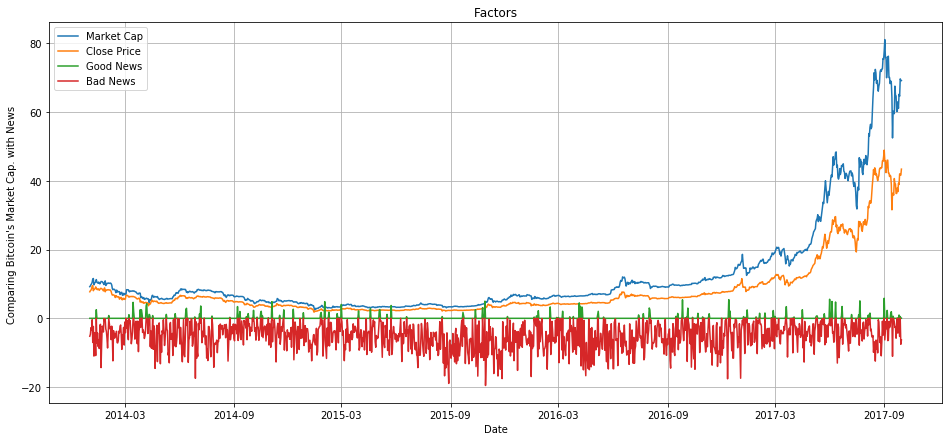

In [20]:
sorce_per_date = news[news['date']>='2014-01-01'].groupby(['date']).sum().reset_index()
btc = btc_history[btc_history['dt'] < '2017-10-01']
btc = btc[['Date','Market Cap','Close','dt']].sort_values(by='dt')
x = sorce_per_date['date']

good_news = sorce_per_date['score'].apply(lambda x: max(x,0))
bad_news = sorce_per_date['score'].apply(lambda x: min(x,0))

plt.figure(figsize=(16,7))
plt.subplot(1,1,1)
plt.plot(x, btc['Market Cap'] / 1e9, label='Market Cap')
plt.plot(x, btc['Close']/100, label='Close Price')
plt.plot(x, good_news*2, label='Good News')
plt.plot(x, bad_news*2, label='Bad News')
plt.xlabel('Date')
plt.legend()

plt.ylabel("Comparing Bitcoin's Market Cap. with News ")
plt.title("Factors")
plt.grid(True)

# It looks pretty random, lets try to focus on specify categories
-------------------------------------------------
Say "Business and finance", "Economy"...  lets first see what are the categories

In [21]:
news['category'].unique()

array([nan, 'Arts, culture and entertainment',
       'Armed conflicts and incidents', 'Politics and government',
       'Science, medicine and technology', 'Education',
       'Religion and spirituality', 'Sports and Recreation',
       'Business and the economy', 'International Relations', 'Economy',
       'Business', 'Sport', 'Society', 'Architecture', 'Television',
       'Discoveries', 'Weather', 'Bird Deaths', 'Transport', None,
       'Transport\xa0', 'Other', 'Arrests, detentions and prosecutions',
       'Geography', 'Religious affairs', 'Media and people', 'Deaths',
       'Life and death', 'Literature', 'Human rights', 'Exploration',
       'Media', 'Physics', 'Gaming', 'Defence', 'Miscellaneous news',
       'Miscellaneous', 'Celebrations'], dtype=object)

# Lets group the interesting news togather 

In [22]:
sci_key = ['Science, medicine and technology', 'Education', 'Life and death', 'Literature', 'Literature', 'Physics']
incidents_key = ['Armed conflicts and incidents']
business_key = ['Politics and government','Business and the economy','International relations',
                'Economy', 'Business','Society']

news['Science'] = news[['category','score']].apply(lambda x: x[1] if (x[0] or "") in sci_key else 0 , axis=1)
news['Incidents'] = news[['category','score']].apply(lambda x: x[1] if (x[0] or "") in incidents_key else 0 , axis=1)
news['Business'] = news[['category','score']].apply(lambda x: x[1] if (x[0] or "") in business_key else 0 , axis=1)

## Lets plot it and see any interesting relationship

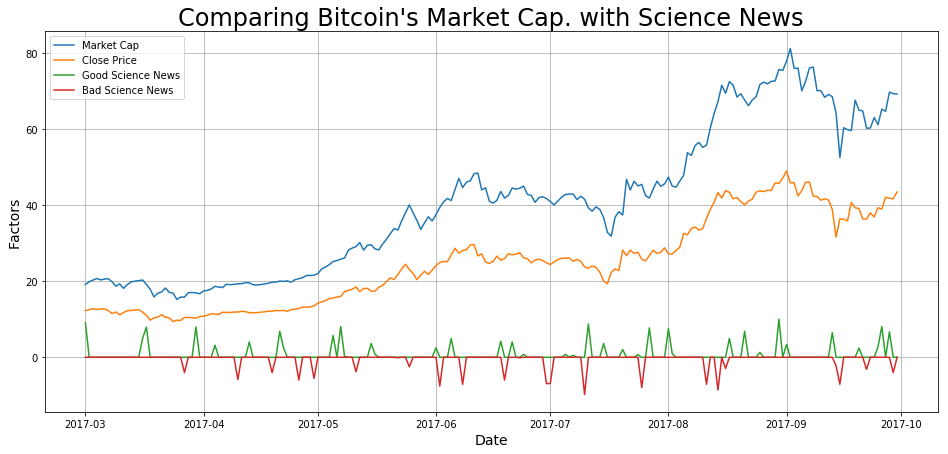

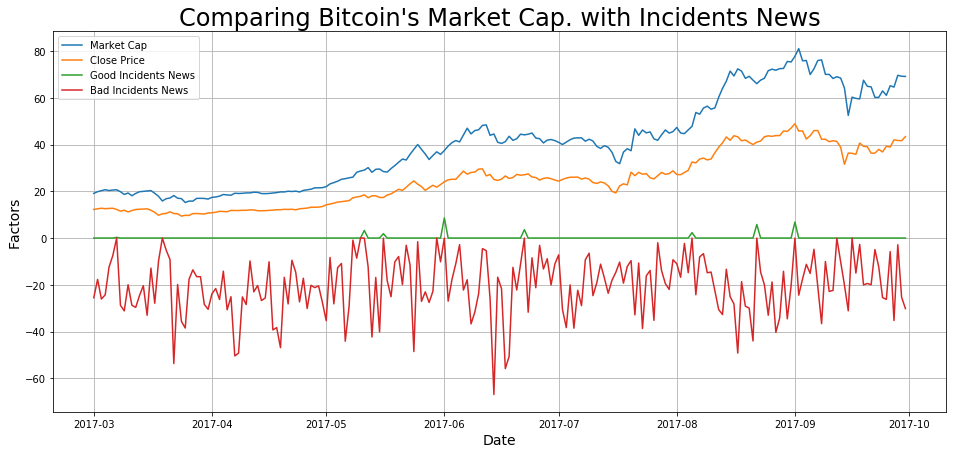

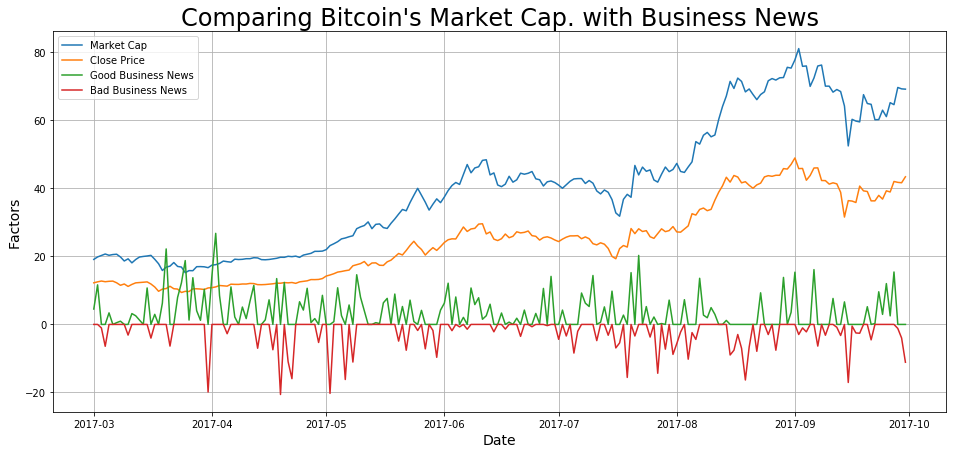

In [24]:
def PlotNews(cat="Science", start_date='2017-03-01'):
    sorce_per_date = news[news['date']>=start_date].groupby(['date']).sum().reset_index()
    btc = btc_history[(btc_history['dt'] < '2017-10-01') & (btc_history['dt'] >= start_date)]
    btc = btc[['Date','Market Cap','Close','dt']].sort_values(by='dt')
    x = sorce_per_date['date']

    good_news = sorce_per_date[cat].apply(lambda x: max(x,0))
    bad_news = sorce_per_date[cat].apply(lambda x: min(x,0))

    plt.figure(figsize=(16,7))
    plt.subplot(1,1,1)
    plt.plot(x, btc['Market Cap'] / 1e9, label='Market Cap')
    plt.plot(x, btc['Close']/100, label='Close Price')
    plt.plot(x, good_news*10, label='Good {} News'.format(cat))
    plt.plot(x, bad_news*10, label='Bad {} News'.format(cat))
    plt.xlabel('Date', fontsize=14)
    plt.legend()

    plt.ylabel("Factors", fontsize=14)
    plt.title("Comparing Bitcoin's Market Cap. with {} News".format(cat), fontsize=24)
    plt.grid(True)
    plt.savefig(r"output/{}.png".format(cat))

PlotNews("Science")
PlotNews("Incidents")
PlotNews("Business")

## Lets check the news headline and find the true relationship

In [27]:
check = news[(news['date']>='2017-08-01') & (news['date']<'2017-09-01') & (news['Science']>0)]
check[['date','category','sub_category','news_header','score']]

,date,category,sub_category,news_header,score
60814,2017-08-01,"Science, medicine and technology",Epidemiology of HIV/AIDS,"According to the United Nations, the Philippines has the largest increase in HIV/AIDS in the Asia Pacific region with about a 140% increase in cases from 2010 until 2016 possibly causing a 'national emergency.' (ABC.net.au), (Human Rights Watch)",0.7506
60825,2017-08-02,"Science, medicine and technology",Gene editing,"Teams of United States-based researchers, composed of American, Chinese and South Korean scientists, successfully edit a piece of faulty DNA that causes a deadly form of heart disease from cells in human embryos. (BBC) (CNN) () ()",0.5719
60951,2017-08-17,"Science, medicine and technology",Aftermath of the,"Internet firm CloudFlare ceased CDN support for the neo-Nazi, white supremacist website , after The Daily Stormer claimed that the company supported their cause. The Daily Stormer website had already lost web-hosting services by the domain register GoDaddy and Google (Cloudflare's Official Blog) (CNN Money)",0.4939
60988,2017-08-21,"Science, medicine and technology","Solar eclipse of August 21, 2017","Millions of United States residents and visitors are able to witness a total solar eclipse that crosses through North America. It is the first total solar eclipse visible across the entire contiguous United States since the solar eclipse of June 8, 1918. (CBS)",0.6808
61027,2017-08-25,"Science, medicine and technology",2017 in spaceflight,"FORMOSAT-5, the first satellite fully designed by Taiwan's National Space Organization, is launched into low-earth orbit by SpaceX's Falcon 9 rocket. (AP via Bloomberg)",0.1280
61068,2017-08-30,"Science, medicine and technology",Childhood leukemia,The Food and Drug Administration has approved the first treatment that genetically engineers patients' own blood cells to destroy acute lymphoblastic leukemia. The approval makes Novartis the proprietor of the first gene therapy to hit the U.S. market. (AP),0.3400
61071,2017-08-30,"Science, medicine and technology",Fast radio bursts,"Researchers at the Breakthrough Listen initiative announce they have detected 15 new powerful fast radio bursts (FRB) from FRB 121102, located in a dwarf galaxy about three billion light-years from Earth. FRB 121102 was first detected in 2012, and gained further attention after FRBs were detected from there again in 2015. () (Phys)",0.6597


# Future Work, we should eliminate long term trend by finding a function on the graph, then apply the function to each node and remove the trend from the chart.

## We can check what happy to cryptocurrency news

In [28]:
news['crypo'] = news[['news_header','score']] \
                .apply(lambda x: x[1] if (x[0] or "") in crypo_keywords else 0,
                       axis=1)